# Stochastic Processes: <br>Data Analysis and Computer Simulation
<br>


# Distribution function and random number
<br>


# 2. Generating random numbers with Gaussian/binomial/Poisson distributions
<br>

# 2.1. Preparations

## Python built-in functions for random numbers (numpy.random)

1. `seed(seed)`: Initialize the generator with an integer "seed".
1. `rand(d0,d1,...,dn)`: Return a multi-dimensional array of uniform random numbers of shape (d0, d1, ... , dn).
1. `randn(d0,d1,...,dn)`: The same as above but from the standard normal distribution.
1. `binomial(M,p,size)`: Draw samples from a binomial distribution with "M" and "p".
1. `poisson(a,size)`: Draw samples from a Poisson distribution with "a".
1. `choice([-1,1],size)`: Generates random samples from the two choices, -1 or 1 in this case.
1. `normal(ave,std,size)`: Draw random samples from a normal distribution.
1. `uniform([low,high,size])`: Draw samples from a uniform distribution.


- See the Scipy website for details <br>
https://docs.scipy.org/doc/numpy-dev/reference/routines.random.html

## Import common libraries

In [1]:
%matplotlib inline
import numpy as np # import numpy library as np
import math # use mathematical functions defined by the C standard
import matplotlib.pyplot as plt # import pyplot library as plt 
plt.style.use('ggplot') # use "ggplot" style for graphs

# 2.2. Normal / Gaussian distribution

## Generate random numbers, $x_0, x_1, \cdots, x_N$

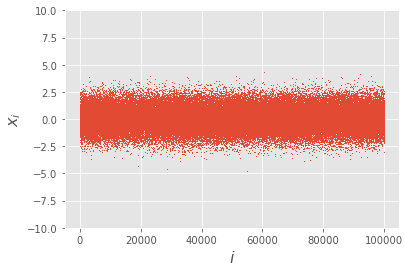

In [2]:
ave = 0.0 # set average
std = 1.0 # set standard deviation
N = 100000 # number of generated random numbers
np.random.seed(0) # initialize the random number generator with seed=0
X = ave+std*np.random.randn(N) # generate random sequence and store it as X
plt.ylim(-10,10) # set y-range
plt.xlabel(r'$i$',fontsize=16) # set x-label
plt.ylabel(r'$x_i$',fontsize=16) # set y-label
plt.plot(X,',') # plot x_i vs. i (i=1,2,...,N) with dots
plt.show() # draw plots

## Compare the distribution with the normal distribution function

\begin{equation}
P(x)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\langle X \rangle)^2}{2\sigma^2}\right]\tag{D1}
\end{equation}

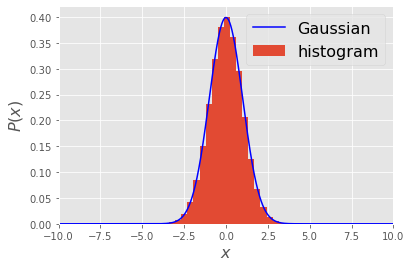

In [3]:
plt.hist(X,bins=25,density=True) # plot normalized histogram of R using 25 bins
x = np.arange(-10,10,0.01) # create array of x from 0 to 1 with increment 0.01
y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # create array of y as y=1
plt.xlim(-10,10) # set x-range
plt.plot(x,y,color='b') # plot y vs. x with blue line
plt.xlabel(r'$x$',fontsize=16) # set x-label
plt.ylabel(r'$P(x)$',fontsize=16) # set y-label
plt.legend([r'Gaussian',r'histogram'], fontsize=16) # set legends
plt.show() # display plots

## Calculate the auto-correlation function $\varphi(i)$

### The definition

\begin{equation}
\varphi(i)=\frac{1}{N}\sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)\left(x_{i+j}-\langle X\rangle\right) \tag{D2}
\end{equation}

\begin{equation}
\varphi(i=0)=\frac{1}{N}\sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)^2=\langle x_j - \langle X\rangle\rangle^2=\sigma^2\tag{D3}
\end{equation}

\begin{equation}
\varphi(i\ne 0)= \langle x_j - \langle X\rangle\rangle\langle x_{i\ne j} - \langle X\rangle\rangle=0\hspace{5mm}
(\rightarrow{\rm White\ noise})\hspace{-12mm}
\tag{D4}
\end{equation}

### A code example to calculate auto-correlation

\sigma^2  = 1.0


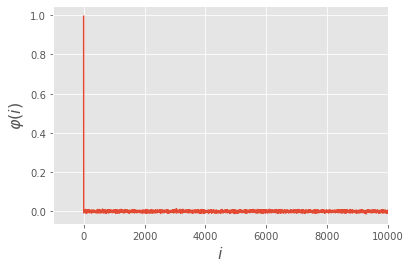

In [4]:
def auto_correlate(x):
    cor = np.correlate(x,x,mode="full")
    return cor[N-1:]
c = np.zeros(N)
c = auto_correlate(X-ave)/N
plt.plot(c)
plt.xlim(-1000,10000)
plt.xlabel(r'$i$',fontsize=16)
plt.ylabel(r'$\varphi(i)$',fontsize=16)
print('\sigma^2  =',std**2)
plt.show()

# 2.3. Binomial distribution

## Generate random numbers, $n_0, n_1, \cdots, n_N$

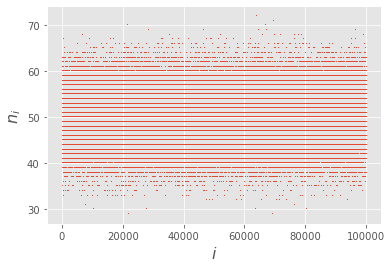

In [5]:
p = 0.5 # set p, propability to obtain "head" from a coin toss
M = 100 # set M, number of tosses in one experiment
N = 100000 # number of experiments
np.random.seed(0) # initialize the random number generator with seed=0
X = np.random.binomial(M,p,N) # generate the number of heads after M tosses, N times, and store it as X
plt.xlabel(r'$i$',fontsize=16) # set x-label
plt.ylabel(r'$n_i$',fontsize=16) # set y-label
plt.plot(X,',') # plot n_i vs. i (i=1,2,...,N) with dots
plt.show() # draw plots

## Compare the distribution with the Binomial distribution function

\begin{equation}
P(n)=\frac{M!}{n!(M-n)!}p^{n}(1-p)^{M-n}\tag{D5}
\end{equation}

\begin{equation}
\langle n \rangle=Mp\tag{D6}
\end{equation}

\begin{equation}
\sigma^2=Mp(1-p)\tag{D7}
\end{equation}

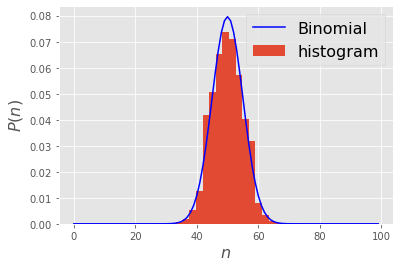

In [6]:
def binomial(n,m,p):
    comb=math.factorial(m)/(math.factorial(n)*math.factorial(m-n))
    prob=comb*p**n*(1-p)**(m-n)
    return prob
plt.hist(X,bins=20,density=True) # plot normalized histogram of R using 22 bins
x = np.arange(M) # generate array of x values from 0 to 100, in intervals of 1
y = np.zeros(M) # generate array of y values, initialized to 0
for i in range(M):
    y[i]=binomial(i,M,p) # compute binomial distribution P(n), Eq. (D5)
plt.plot(x,y,color='b') # plot y vs. x with blue line
plt.xlabel(r'$n$',fontsize=16) # set x-label
plt.ylabel(r'$P(n)$',fontsize=16) # set y-label
plt.legend([r'Binomial',r'histogram'], fontsize=16) # set legends
plt.show() # display plots

## Calculate the auto-correlation function $\varphi(i)$

### The definition

\begin{equation}
\varphi(i)=\frac{1}{N}\sum_{j=1}^{N} \left(n_j - \langle n\rangle\right)\left(n_{i+j}-\langle n\rangle\right) \tag{D8}
\end{equation}

\begin{equation}
\varphi(i=0)=\frac{1}{N}\sum_{j=1}^{N} \left(n_j - \langle n\rangle\right)^2=\langle n_j - \langle n\rangle\rangle^2=\sigma^2=Mp(1-p)\tag{D9}
\end{equation}

\begin{equation}
\varphi(i\ne 0)= \langle n_j - \langle n\rangle\rangle\langle n_{i\ne j} - \langle n\rangle\rangle=0\hspace{8mm}
(\rightarrow{\rm White\ noise})\hspace{10mm}
\tag{D10}
\end{equation}

### A code example to calculate auto-correlation

\sigma^2  = 25.0


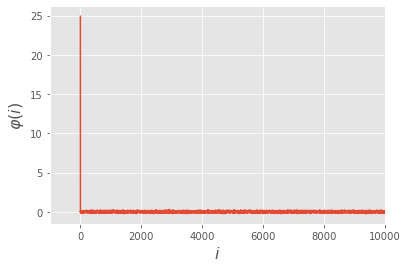

In [7]:
def auto_correlate(x):
    cor = np.correlate(x,x,mode="full")
    return cor[N-1:]
c = np.zeros(N)
c = auto_correlate(X-M*p)/N
plt.plot(c)
plt.xlim(-1000,10000)
plt.xlabel(r'$i$',fontsize=16)
plt.ylabel(r'$\varphi(i)$',fontsize=16)
print('\sigma^2  =',M*p*(1-p))
plt.show()

# 2.4. Poisson distribution

## Generate random numbers, $n_0, n_1, \cdots, n_N$

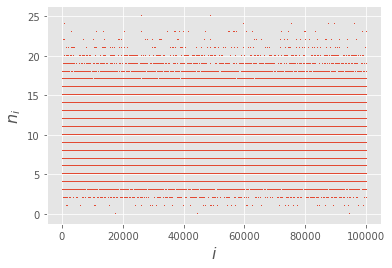

In [8]:
a = 10.0 # set a, the expected value
N = 100000 #  number of generated random numbers
np.random.seed(0) # initialize the random number generator with seed=0
X = np.random.poisson(a,N) # generate randon numbers from poisson distribution
plt.xlabel(r'$i$',fontsize=16) # set x-label
plt.ylabel(r'$n_i$',fontsize=16) # set y-label
plt.plot(X,',') # plot n_i vs. i (i=1,2,...,N) with dots
plt.show() # draw plots

## Compare the distribution with the binomial distribution function

\begin{equation}
P(n)=\frac{a^n e^{-a}}{n!}\tag{D11}
\end{equation}

\begin{equation}
\langle n \rangle=a\tag{D12}
\end{equation}

\begin{equation}
\sigma^2=a\tag{D13}
\end{equation}


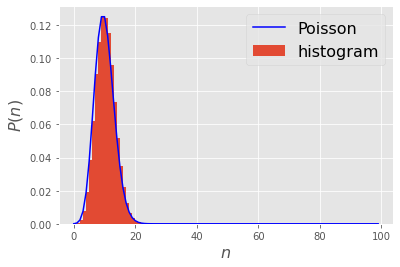

In [9]:
def poisson(n,a):
    prob=a**n*np.exp(-a)/math.factorial(n)
    return prob
plt.hist(X,bins=25,density=True) # plot normalized histogram of X using 25 bins
x = np.arange(M) # generate array of x values from 0 to 100, in intervals of 1
y = np.zeros(M) # generate array of y values, initialized to zero
for i in range(M):
    y[i]=poisson(i,a) # Compute Poisson distribution for n, Eq. (D11)
plt.plot(x,y,color='b') # plot y vs. x with blue line
plt.xlabel(r'$n$',fontsize=16) # set x-label
plt.ylabel(r'$P(n)$',fontsize=16) # set y-label
plt.legend([r'Poisson',r'histogram'], fontsize=16) # set legends
plt.show() # display plots